In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# We'll need this to split the train and test data
from sklearn.model_selection import train_test_split

# We'll need this to encode the categorical features into numerical ones
from sklearn.preprocessing import LabelEncoder

# We'll use random forests classifier
from sklearn.ensemble import RandomForestClassifier

# We'll use some scoring 
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [151]:
type_map = {
    "culmen_length_mm" : np.float64,
    "culmen_depth_mm"  : np.float64,
    "flipper_length_mm": np.float64,
    "body_mass_g"      : np.float64}

df = pd.read_csv("penguins.csv", dtype=type_map)

In [111]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [81]:
df["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [36]:
df["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [84]:
df.isna().sum().sum()

18

In [38]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [82]:
# We can drop the records with missing values
# df = df.dropna()
# but we'll not do that now

# We could fill the missing values withe MEDIAN, MEAN, BACKFILL, FORWARD FILL, etc.
# but this is important:
#
# !! We should NOT DO THAT before we split the data into train set and test set.
# !! Because if we do filling e.g. with MEDIAN or MEAN from entire set, we are compromising train set
# !! with data from entire set (incl. test set).
# !! THAT IS NOT ALLOWED

In [152]:
# When doing deletion, this will save us a lot of time. Deletion is not contaminating data by test data.

df = df.dropna()

### Split of the train and test set

In [40]:
# Importing necessary fucntion from sklearn.model_selection package

from sklearn.model_selection import train_test_split

In [42]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [122]:
# Extracting label as numpy array from dataframe

# The convention is to mark it with lowercase "y" - it's a vector y
y = df["species"].values

In [123]:
y

array(['Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adel

In [124]:
y.shape

(334,)

In [116]:
type(y)

numpy.ndarray

In [125]:
# Extraction of the rest of the "features" form dataframe

# Convention is to use CAPITAL X as it indicates matrix (as numpy array)
X = df.loc[:, df.columns != "species"].values

In [118]:
X

array([['Torgersen', 39.1, 18.7, 181.0, 3750.0, 'MALE'],
       ['Torgersen', 39.5, 17.4, 186.0, 3800.0, 'FEMALE'],
       ['Torgersen', 40.3, 18.0, 195.0, 3250.0, 'FEMALE'],
       ...,
       ['Biscoe', 50.4, 15.7, 222.0, 5750.0, 'MALE'],
       ['Biscoe', 45.2, 14.8, 212.0, 5200.0, 'FEMALE'],
       ['Biscoe', 49.9, 16.1, 213.0, 5400.0, 'MALE']], dtype=object)

In [52]:
type(X)

numpy.ndarray

In [126]:
X.shape

(334, 6)

In [127]:
# This is how we split:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [128]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((250, 6), (84, 6), (250,), (84,))

### Now we can do data cleaning.

Following block is not necessary really. We removed empty lines already

In [132]:
df_train = pd.DataFrame(X_train, columns=df.columns[1:])

In [130]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   island             250 non-null    object
 1   culmen_length_mm   250 non-null    object
 2   culmen_depth_mm    250 non-null    object
 3   flipper_length_mm  250 non-null    object
 4   body_mass_g        250 non-null    object
 5   sex                250 non-null    object
dtypes: object(6)
memory usage: 11.8+ KB


In [76]:
df_train

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,42.5,20.7,197.0,4500.0,MALE
1,Biscoe,38.8,17.2,180.0,3800.0,MALE
2,Biscoe,46.2,14.5,209.0,4800.0,FEMALE
3,Dream,39.0,18.7,185.0,3650.0,MALE
4,Dream,49.3,19.9,203.0,4050.0,MALE
...,...,...,...,...,...,...
253,Dream,47.6,18.3,195.0,3850.0,FEMALE
254,Torgersen,39.7,18.4,190.0,3900.0,MALE
255,Biscoe,38.6,17.2,199.0,3750.0,FEMALE
256,Biscoe,46.6,14.2,210.0,4850.0,FEMALE


In [78]:
df_train = df_train.dropna()

In [133]:
df_train.shape

(250, 6)

In [134]:
df_train["species"] = y_train

In [138]:
df_train = df_train.astype(type_map)

In [141]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   island             250 non-null    object 
 1   culmen_length_mm   250 non-null    float64
 2   culmen_depth_mm    250 non-null    float64
 3   flipper_length_mm  250 non-null    float64
 4   body_mass_g        250 non-null    float64
 5   sex                250 non-null    object 
 6   species            250 non-null    object 
dtypes: float64(4), object(3)
memory usage: 13.8+ KB


In [142]:
df_train

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species
0,Biscoe,47.2,15.5,215.0,4975.0,FEMALE,Gentoo
1,Biscoe,43.6,13.9,217.0,4900.0,FEMALE,Gentoo
2,Dream,38.8,20.0,190.0,3950.0,MALE,Adelie
3,Biscoe,47.5,14.0,212.0,4875.0,FEMALE,Gentoo
4,Dream,53.5,19.9,205.0,4500.0,MALE,Chinstrap
...,...,...,...,...,...,...,...
245,Dream,50.9,19.1,196.0,3550.0,MALE,Chinstrap
246,Torgersen,37.2,19.4,184.0,3900.0,MALE,Adelie
247,Biscoe,39.7,17.7,193.0,3200.0,FEMALE,Adelie
248,Biscoe,45.5,15.0,220.0,5000.0,MALE,Gentoo


### Data exploration

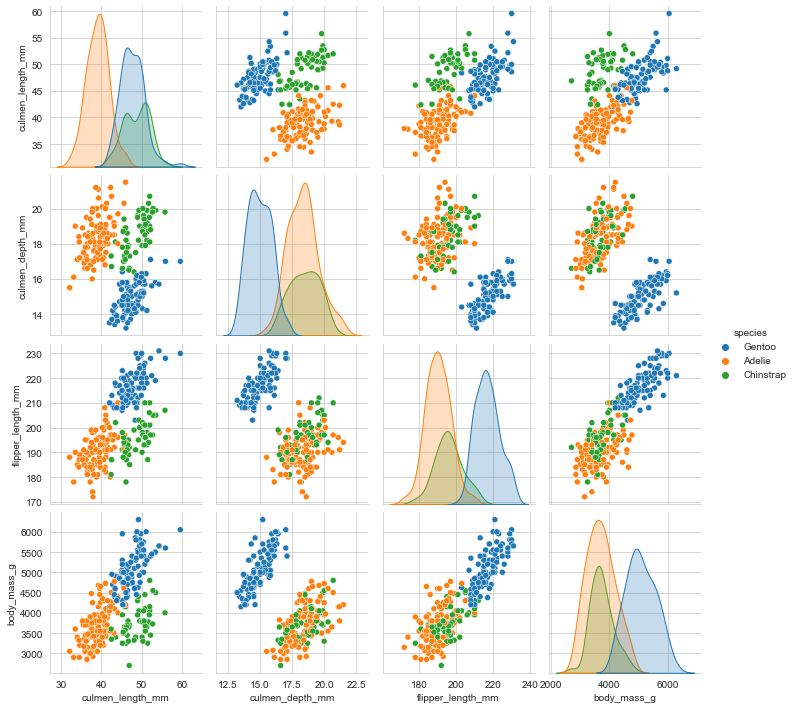

In [143]:
sns.pairplot(data=df_train, hue="species")

### Feature encoding

In [147]:
# Create LabelEncoder object

le = LabelEncoder()

In [149]:
# This is how we encode e.g. "sex" Series

le.fit_transform(df["sex"])

array([2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2,
       1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2,
       1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1,
       2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,

In [160]:
# We can already put it into the dataframe

df["sex"] = le.fit_transform(df["sex"])
df["island"] = le.fit_transform(df["island"])

df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,41,56,5,30,2
1,0,2,44,43,10,32,1
2,0,2,50,49,19,11,1
4,0,2,21,62,17,18,1
5,0,2,43,73,14,26,2
...,...,...,...,...,...,...,...
338,2,0,107,6,37,68,1
340,2,0,104,12,38,65,1
341,2,0,135,26,45,86,2
342,2,0,88,17,35,75,1


In [158]:
# How to do entire df using .apply()

df = df.apply(le.fit_transform)

# This is actually NOT A GOOD IDEA. As you can see, even the NUMERICAL features are transformed!

df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,41,56,5,30,2
1,0,2,44,43,10,32,1
2,0,2,50,49,19,11,1
4,0,2,21,62,17,18,1
5,0,2,43,73,14,26,2
...,...,...,...,...,...,...,...
338,2,0,107,6,37,68,1
340,2,0,104,12,38,65,1
341,2,0,135,26,45,86,2
342,2,0,88,17,35,75,1


In [162]:
df_train["sex"] = le.fit_transform(df_train["sex"])
df_train["island"] = le.fit_transform(df_train["island"])

In [163]:
df_train

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species
0,0,47.2,15.5,215.0,4975.0,1,Gentoo
1,0,43.6,13.9,217.0,4900.0,1,Gentoo
2,1,38.8,20.0,190.0,3950.0,2,Adelie
3,0,47.5,14.0,212.0,4875.0,1,Gentoo
4,1,53.5,19.9,205.0,4500.0,2,Chinstrap
...,...,...,...,...,...,...,...
245,1,50.9,19.1,196.0,3550.0,2,Chinstrap
246,2,37.2,19.4,184.0,3900.0,2,Adelie
247,0,39.7,17.7,193.0,3200.0,1,Adelie
248,0,45.5,15.0,220.0,5000.0,2,Gentoo


In [167]:
y_train = df_train["species"]
X_train = df_train.loc[:, df_train.columns != "species"].values
y_train.shape, X_train.shape

((250,), (250, 6))

In [179]:
df_test = pd.DataFrame(X_test, columns=df.columns[df.columns != "species"])

In [180]:
df_test["species"]=y_test

In [181]:
df_test

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species
0,Dream,39.5,16.7,178.0,3250.0,FEMALE,Adelie
1,Biscoe,46.9,14.6,222.0,4875.0,FEMALE,Gentoo
2,Torgersen,42.1,19.1,195.0,4000.0,MALE,Adelie
3,Dream,49.8,17.3,198.0,3675.0,FEMALE,Chinstrap
4,Biscoe,41.1,18.2,192.0,4050.0,MALE,Adelie
...,...,...,...,...,...,...,...
79,Biscoe,47.8,15.0,215.0,5650.0,MALE,Gentoo
80,Torgersen,40.2,17.0,176.0,3450.0,FEMALE,Adelie
81,Dream,39.2,18.6,190.0,4250.0,MALE,Adelie
82,Dream,40.9,16.6,187.0,3200.0,FEMALE,Chinstrap


In [186]:
df_test = df_test.astype(type_map)

In [188]:
df_test

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species
0,Dream,39.5,16.7,178.0,3250.0,FEMALE,Adelie
1,Biscoe,46.9,14.6,222.0,4875.0,FEMALE,Gentoo
2,Torgersen,42.1,19.1,195.0,4000.0,MALE,Adelie
3,Dream,49.8,17.3,198.0,3675.0,FEMALE,Chinstrap
4,Biscoe,41.1,18.2,192.0,4050.0,MALE,Adelie
...,...,...,...,...,...,...,...
79,Biscoe,47.8,15.0,215.0,5650.0,MALE,Gentoo
80,Torgersen,40.2,17.0,176.0,3450.0,FEMALE,Adelie
81,Dream,39.2,18.6,190.0,4250.0,MALE,Adelie
82,Dream,40.9,16.6,187.0,3200.0,FEMALE,Chinstrap


In [189]:
df_test["sex"] = le.fit_transform(df_test["sex"])
df_test["island"] = le.fit_transform(df_test["island"])

df_test

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species
0,1,39.5,16.7,178.0,3250.0,0,Adelie
1,0,46.9,14.6,222.0,4875.0,0,Gentoo
2,2,42.1,19.1,195.0,4000.0,1,Adelie
3,1,49.8,17.3,198.0,3675.0,0,Chinstrap
4,0,41.1,18.2,192.0,4050.0,1,Adelie
...,...,...,...,...,...,...,...
79,0,47.8,15.0,215.0,5650.0,1,Gentoo
80,2,40.2,17.0,176.0,3450.0,0,Adelie
81,1,39.2,18.6,190.0,4250.0,1,Adelie
82,1,40.9,16.6,187.0,3200.0,0,Chinstrap


In [193]:
y_test = df_test["species"]
X_test = df_test.loc[:, df_test.columns != "species"].values

y_test.shape, X_test.shape

((84,), (84, 6))

### Feeding our train set into the model

#### Random Forests Classifier

In [169]:
# We create random forest model object

random_forest_model = RandomForestClassifier()

In [195]:
# Training the model object with the train data

random_forest_model.fit(X_train, y_train)

RandomForestClassifier()

In [196]:
# Testing the model with test data (making prediction)

y_pred = random_forest_model.predict(X_test)

In [197]:
y_pred

array(['Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Adelie', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Chinstrap', 'Chinstrap', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Chinstrap',
       'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Adelie'], dtype=object

In [198]:
# Calculating the accuracy score

accuracy_score(y_test, y_pred)

0.9880952380952381

In [202]:
# Confusion matrix

cm = confusion_matrix(y_test, y_pred)

cm

array([[40,  0,  0],
       [ 1, 14,  0],
       [ 0,  0, 29]], dtype=int64)

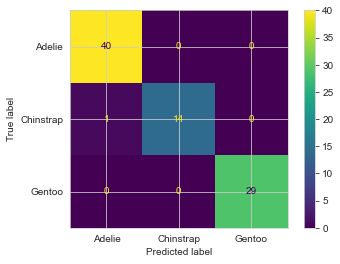

In [206]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(random_forest_model, X_test, y_test)

In [209]:
precision = precision_score(y_test, y_pred, average="micro")
recall = recall_score(y_test, y_pred, average="micro")
f1 = f1_score(y_test, y_pred, average="micro")

precision, recall, f1

(0.9880952380952381, 0.9880952380952381, 0.9880952380952381)

In [210]:
from sklearn.neighbors import KNeighborsClassifier

In [211]:
kneighbors_classifier = KNeighborsClassifier()

In [212]:
kneighbors_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [214]:
y_pred = kneighbors_classifier.predict(X_test)

y_pred

array(['Chinstrap', 'Gentoo', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Gentoo', 'Gentoo', 'Adelie', 'Chinstrap', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Chinstrap',
       'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie',
       'Chinstrap', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Adelie'], dtype=object)

In [215]:
accuracy_score(y_pred, y_test)

0.8333333333333334